# Using Neural Network Formulations in OMLT

In this example we show how different neural networks can be formulated using Pyomo and OMLT. This notebook assumes you have a working tensorflow environment in addition to other necessary packages denoted below.

## Library Setup 1
Start by importing the libraries used in this project:

Base libraries used this project: <br>
`numpy`, `pandas`: data manipulation <br>
`json`: needed to write neural network parameters (e.g. scaling information) <br>
`matplotlib`: used for plotting the results in this example


In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', size=24)
plt.rc('axes', titlesize=24)

## Library Setup 2
OMLT extends Pyomo blocks and provides capabilities to use Keras neural networks. In this example we use Pyomo to setup an optimization problem and we use Keras (through tensorflow) to train a simple neural network.
- `pyomo`: the algebraic modeling language for Python, it is used to define the optimization model passed to the solver
- `tensorflow`: the machine learning language we use to train our neural network

In [2]:
import pyomo.environ as pyo
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

## Library Setup 3
We import the following classes from OMLT:
 - `OmltBlock`: A Pyomo custom block that can represent machine learning models (such as neural networks)

In [3]:
from omlt import OmltBlock
from omlt.neuralnet import NetworkDefinition, NeuralNetworkFormulation, ComplementarityReLUActivation
from omlt.io import keras_reader
import omlt

## Import the Data

For demonstration purposes, we trained a neural network that learned a simple sin wave function given by:<br>
$$
y=sin(\omega x) + x^2
$$
on the interval $x \in [-2,2]$

In [4]:
df = pd.read_csv("../data/sin_quadratic.csv",index_col=[0])
df

,x,y
0,-2.0000,4.566349
1,-1.9996,4.553958
2,-1.9992,4.539837
3,-1.9988,4.576585
4,-1.9984,4.574317
...,...,...
9995,1.9984,3.537576
9996,1.9988,3.542588
9997,1.9992,3.506658
9998,1.9996,3.489701


The training data captures the function of interest and is plotted below (on the left). We also scale the training data to a mean of zero with unit standard deviation. The scaled inputs and outputs are added to the dataframe and plotted next to the true values (on the right).

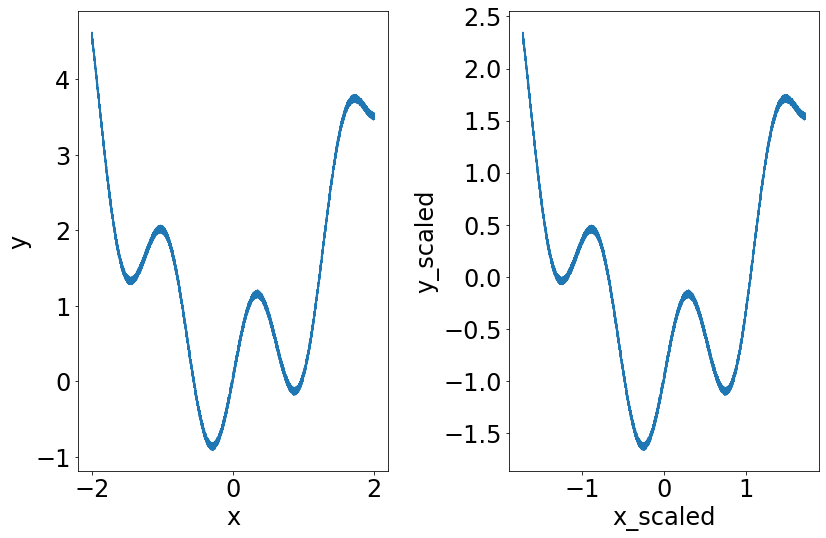

In [11]:
x = df["x"]
y = df["y"]

mean_data = df.mean(axis=0)
std_data = df.std(axis=0)
df["x_scaled"] = (df['x'] - mean_data['x']) / std_data['x']
df["y_scaled"] = (df['y'] - mean_data['y']) / std_data['y']

f, (ax1, ax2) = plt.subplots(1, 2,figsize = (12,8))

ax1.plot(x, y)
ax1.set_xlabel("x")
ax1.set_ylabel("y");


ax2.plot(df["x_scaled"], df["y_scaled"])
ax2.set_xlabel("x_scaled")
ax2.set_ylabel("y_scaled");

plt.tight_layout()

## Train the Neural Network
After producing our simple dataset, we use keras and tensorflow to train two neural networks to represent the quadratic sin curve. 

In [6]:
#relu neural network
model1 = Sequential(name='sin_wave_relu')
model1.add(Input(1))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer=Adam(), loss='mse')

#sigmoid neural network
model2 = Sequential(name='sin_wave_sigmoid')
model2.add(Input(1))
model2.add(Dense(100, activation='sigmoid'))
model2.add(Dense(100, activation='sigmoid'))
model2.add(Dense(1))
model2.compile(optimizer=Adam(), loss='mse')

#mixed neural network
model3 = Sequential(name='sin_wave_sigmoid')
model3.add(Input(1))
model3.add(Dense(100, activation='sigmoid'))
model3.add(Dense(100, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer=Adam(), loss='mse')

In [10]:
history1 = model1.fit(x=df['x_scaled'], y=df['y_scaled'],verbose=1, epochs=50)
history2 = model2.fit(x=df['x_scaled'], y=df['y_scaled'],verbose=1, epochs=50)
history3 = model3.fit(x=df['x_scaled'], y=df['y_scaled'],verbose=1, epochs=50)

Epoch 1/50
313/313 [==============================] - 0s 1ms/step - loss: 0.0646
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0571
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0422
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0213
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0027
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 9/50
313/313 [==============================] - 1s 2ms/step - loss: 8.8554e-04
Epoch 10/50
313/313 [==============================] - 1s 2ms/step - loss: 9.5661e-04
Epoch 11/50
313/313 [==============================] - 1s 2ms/step - loss: 8.3607e-04
Epoch 12/50
313/313 [==============================] - 1s 2ms/step - loss: 7.8832e-04
Epoch 13/

313/313 [==============================] - 1s 3ms/step - loss: 8.3117e-04
Epoch 49/50
313/313 [==============================] - 1s 2ms/step - loss: 6.7491e-04
Epoch 50/50
313/313 [==============================] - 1s 2ms/step - loss: 7.0586e-04
Epoch 1/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1157
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1126
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1097
Epoch 4/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1024
Epoch 5/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0994
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0953
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0926
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0889
Epoch 9/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0866
Epoch 10/50
313/313 [====

## Check the predictions

In [12]:
y_predict_scaled_relu = model1.predict(x=df['x_scaled'])
y_predict_relu = y_predict_scaled_relu*(std_data['y']) + mean_data['y']

y_predict_scaled_sigmoid = model2.predict(x=df['x_scaled'])
y_predict_sigmoid = y_predict_scaled_sigmoid*(std_data['y']) + mean_data['y']

y_predict_scaled_mixed = model3.predict(x=df['x_scaled'])
y_predict_mixed = y_predict_scaled_mixed*(std_data['y']) + mean_data['y']

We load the neural network from Keras and show a decent fit to our simple sin curve

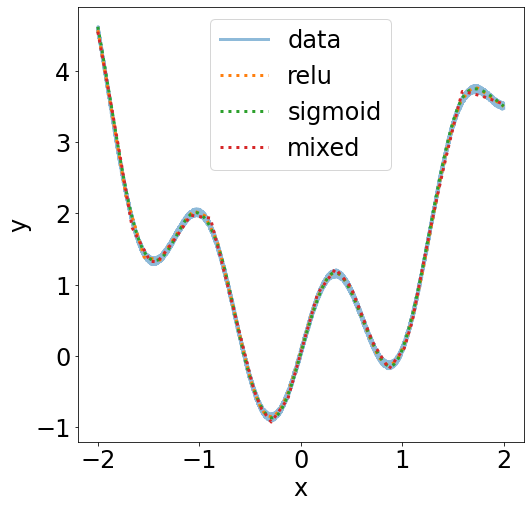

In [35]:
fig,ax = plt.subplots(1,figsize = (8,8))
ax.plot(x,y,linewidth = 3.0,label = "data", alpha = 0.5)
ax.plot(x,y_predict_relu,linewidth = 3.0,linestyle="dotted",label = "relu")
ax.plot(x,y_predict_sigmoid,linewidth = 3.0,linestyle="dotted",label = "sigmoid")
ax.plot(x,y_predict_mixed,linewidth = 3.0,linestyle="dotted",label = "mixed")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

## Formulating a Pyomo model with OMLT
We now show OMLT can be used to optimize over neural networks. We show how to formulate the keras model into `OmltBlock`s and how to formulate different optimization representations.

In [44]:
model = pyo.ConcreteModel()
model.x = pyo.Var()
model.y = pyo.Var()
model.obj = pyo.Objective(expr=(model.y))

Multiple neural network formulations are possible. These include: <br>
`FullSpaceContinuousFormulation`<br> 
`ReducedSpaceContinuousFormulation`<br> 
`ReLUBigMFormulation` <br> 
`ReLUComplementarityFormulation`

## NeuralNetworkFormulations 

### Reduced Space with smooth activations <br>
The full space formulation presents intermediate variables to the optimizer

$$\hat{y} = N(x)$$

### Full Space with smooth activations <br>
The full space formulation presents intermediate variables to the optimizer

$$\hat z_i = \sum_{j{=}1}^N w_{ij} z_j + b_i \ \forall i \in N$$
$$ z_i = \sigma(\hat z) \ \forall i \in N$$


### Representing ReLU with Integer Variables
The full space formulation presents intermediate variables to the optimizer
TODO

### Representing ReLU with Complementarity Constraints
The full space formulation presents intermediate variables to the optimizer
TODO

## Setup scaling and input bounds for OMLT
With OMLT, we need to include scaling information and input bounds to maintain correctness of the optimization problem. 

In [45]:
scaler = omlt.scaling.OffsetScaling(offset_inputs=[mean_data['x']],
                    factor_inputs=[std_data['x']],
                    offset_outputs=[mean_data['y']],
                    factor_outputs=[std_data['y']])

input_bounds=[(min(df['x']),max(df['x']))]

print(scaler)
print(input_bounds)

[(-2.0, 2.0)]


In [37]:
net_relu = keras_reader.load_keras_sequential(model1,scaler,input_bounds)
model.nn = OmltBlock()
formulation = NeuralNetworkFormulation(net,activation_constraints={
            "relu": ComplementarityReLUActivation()})
model.nn.build_formulation(formulation,input_vars=[model.x],output_vars=[model.y])

#query inputs and outputs, as well as scaled inputs and outputs
model.nn.inputs_list.pprint()
model.nn.outputs_list.pprint()
model.nn.scaled_inputs_list.pprint()
model.nn.scaled_outputs_list.pprint()

n_inputs: 1
    'pyomo.core.base.block._ScalarOmltBlock'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.block._ScalarOmltBlock'>). This is
    usually indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
inputs : Size=1, Index=nn.inputs_index
    Key : Lower : Value               : Upper : Fixed : Stale : Domain
      0 :  None : -0.2812927688530739 :  None : False : False :  Reals
outputs : Size=1, Index=nn.outputs_index
    Key : Lower : Value               : Upper : Fixed : Stale : Domain
      0 :  None : -0.8659535741094033 :  None : False : False :  Reals
scaled_inputs : Size=1, Index=nn.scaled_inputs_set
    Key : Lower              : Value : Upper             : Fixed : Stale : Domain
      0 : -1.731791015101997 :     0 : 1.731791015101997 : False : False :  Reals
scaled_outputs : Size=1, Index=nn.scaled_outputs_set
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      0 :  None :   

### Solving the Pyomo Models
Now we solve an inverse problem over the neural network to find an input that produces the desired output <br>
$\min \ \hat{y}$ <br>
$s.t. \hat{y} = N(x)$

### Model 1:
- Neural Network with ReLU activations <br>
- Activations formulated using complementarity conditions

In [48]:
solutions = [] #store solutions for each model
net_relu = keras_reader.load_keras_sequential(model1,scaler,input_bounds)
model.nn = OmltBlock()
formulation = NeuralNetworkFormulation(net,activation_constraints={
            "relu": ComplementarityReLUActivation()})
model.nn.build_formulation(formulation,input_vars=[model.x],output_vars=[model.y])

status = pyo.SolverFactory('ipopt').solve(model, tee=True)
solutions.append((pyo.value(model.x),pyo.value(model.y)))

n_inputs: 1
    'pyomo.core.base.block._ScalarOmltBlock'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.block._ScalarOmltBlock'>). This is
    usually indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
Ipopt 3.13.3: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.3, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:    10811
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      200

Total number of variables.........................

  79 -1.2825338e-01 4.15e-03 2.82e-02  -1.0 4.96e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 -4.4974935e-01 3.30e-02 1.70e+06  -3.8 2.15e+00    -  3.60e-01 5.21e-01f  1
  81 -7.2246188e-01 4.66e-02 3.69e+06  -3.8 1.20e+00    -  4.26e-01 1.00e+00h  1
  82 -8.6555289e-01 2.50e-02 3.52e+06  -3.8 1.05e+00    -  4.20e-02 1.00e+00h  1
  83 -8.4500051e-01 9.29e-04 1.20e+06  -3.8 2.26e-01    -  6.60e-01 1.00e+00h  1
  84 -8.6976866e-01 3.87e-03 2.11e+05  -3.8 3.93e-01    -  8.24e-01 1.00e+00h  1
  85 -8.6922839e-01 2.01e-03 8.21e-04  -3.8 2.51e-01    -  1.00e+00 1.00e+00h  1
  86 -8.6597330e-01 1.44e-05 4.59e-06  -3.8 2.04e-02    -  1.00e+00 1.00e+00h  1
  87 -8.6595609e-01 1.64e-06 8.59e-07  -5.7 6.93e-03    -  1.00e+00 1.00e+00h  1
  88 -8.6595357e-01 3.03e-10 1.67e-10  -8.6 9.41e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 88

                                   (scaled)                 (unscaled)
Objecti

### Model 2
Full-space formulation with smooth sigmoid activation functions 

In [49]:
net_sigmoid = keras_reader.load_keras_sequential(model2,scaler,input_bounds)
model.nn = OmltBlock()
formulation = NeuralNetworkFormulation(net_sigmoid)
model.nn.build_formulation(formulation,input_vars=[model.x],output_vars=[model.y])
status = pyo.SolverFactory('ipopt').solve(model, tee=True)
solutions.append((pyo.value(model.x),pyo.value(model.y)))

n_inputs: 1
    'pyomo.core.base.block._ScalarOmltBlock'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.block._ScalarOmltBlock'>). This is
    usually indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
Ipopt 3.13.3: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.3, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:    10811
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      200

Total number of variables.........................

  76  2.6469954e-01 1.30e-05 9.71e+03  -1.0 3.15e-02   0.0 9.94e-01 1.00e+00h  1
  77  9.8888319e-02 7.41e-03 2.09e+06  -1.0 2.49e+00    -  4.89e-01 2.35e-01f  2
  78  2.0062052e-02 7.69e-03 5.93e+06  -1.0 2.12e+00    -  1.00e+00 1.26e-01f  3
  79 -1.2825338e-01 4.15e-03 2.82e-02  -1.0 4.96e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 -4.4974935e-01 3.30e-02 1.70e+06  -3.8 2.15e+00    -  3.60e-01 5.21e-01f  1
  81 -7.2246188e-01 4.66e-02 3.69e+06  -3.8 1.20e+00    -  4.26e-01 1.00e+00h  1
  82 -8.6555289e-01 2.50e-02 3.52e+06  -3.8 1.05e+00    -  4.20e-02 1.00e+00h  1
  83 -8.4500051e-01 9.29e-04 1.20e+06  -3.8 2.26e-01    -  6.60e-01 1.00e+00h  1
  84 -8.6976866e-01 3.87e-03 2.11e+05  -3.8 3.93e-01    -  8.24e-01 1.00e+00h  1
  85 -8.6922839e-01 2.01e-03 8.21e-04  -3.8 2.51e-01    -  1.00e+00 1.00e+00h  1
  86 -8.6597330e-01 1.44e-05 4.59e-06  -3.8 2.04e-02    -  1.00e+00 1.00e+00h  1
  87 -8.6595609e-01 1.64e-06

### Model 3
- Full-space neural network with mixed ReLU and Sigmoid activation functions
- ReLU activations use complementarity conditions to facilitate the mixed problem

In [50]:
net_mixed = keras_reader.load_keras_sequential(model3,scaler,input_bounds)
model.nn = OmltBlock()
formulation = NeuralNetworkFormulation(net,activation_constraints={
            "relu": ComplementarityReLUActivation()})
model.nn.build_formulation(formulation,input_vars=[model.x],output_vars=[model.y])
status = pyo.SolverFactory('ipopt').solve(model, tee=True)
solutions.append((pyo.value(model.x),pyo.value(model.y)))

n_inputs: 1
    'pyomo.core.base.block._ScalarOmltBlock'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.block._ScalarOmltBlock'>). This is
    usually indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
Ipopt 3.13.3: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.3, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:    10811
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      200

Total number of variables.........................

  79 -1.2825338e-01 4.15e-03 2.82e-02  -1.0 4.96e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 -4.4974935e-01 3.30e-02 1.70e+06  -3.8 2.15e+00    -  3.60e-01 5.21e-01f  1
  81 -7.2246188e-01 4.66e-02 3.69e+06  -3.8 1.20e+00    -  4.26e-01 1.00e+00h  1
  82 -8.6555289e-01 2.50e-02 3.52e+06  -3.8 1.05e+00    -  4.20e-02 1.00e+00h  1
  83 -8.4500051e-01 9.29e-04 1.20e+06  -3.8 2.26e-01    -  6.60e-01 1.00e+00h  1
  84 -8.6976866e-01 3.87e-03 2.11e+05  -3.8 3.93e-01    -  8.24e-01 1.00e+00h  1
  85 -8.6922839e-01 2.01e-03 8.21e-04  -3.8 2.51e-01    -  1.00e+00 1.00e+00h  1
  86 -8.6597330e-01 1.44e-05 4.59e-06  -3.8 2.04e-02    -  1.00e+00 1.00e+00h  1
  87 -8.6595609e-01 1.64e-06 8.59e-07  -5.7 6.93e-03    -  1.00e+00 1.00e+00h  1
  88 -8.6595357e-01 3.03e-10 1.67e-10  -8.6 9.41e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 88

                                   (scaled)                 (unscaled)
Objecti

In [47]:
print(solutions)

[(-0.2812927688532284, -0.8659535741094518)]


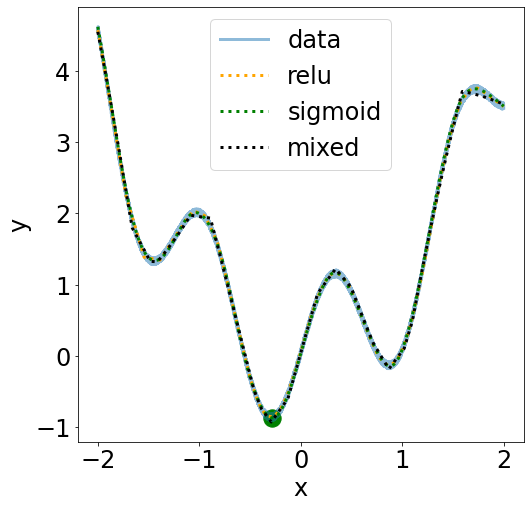

In [51]:
fig,ax = plt.subplots(1,figsize = (8,8))
ax.plot(x,y,linewidth = 3.0,label = "data", alpha = 0.5)
ax.plot(x,y_predict_relu,linewidth = 3.0,linestyle="dotted",label = "relu",color = "orange")
ax.plot(x,y_predict_sigmoid,linewidth = 3.0,linestyle="dotted",label = "sigmoid",color = "green")
ax.plot(x,y_predict_mixed,linewidth = 3.0,linestyle="dotted",label = "mixed", color = "black")
ax.scatter([solutions[0][0]],[solutions[0][1]],color = "green",s = 300)

plt.xlabel("x")
plt.ylabel("y")
plt.legend();

### Model 4
- ReLU neural network formulated using BigM with binary decisions
- Attains global solution using Cbc

In [52]:
net_relu = keras_reader.load_keras_sequential(model1,scaler,input_bounds)
model.nn = OmltBlock()
formulation = NeuralNetworkFormulation(net_relu)
model.nn.build_formulation(formulation,input_vars=[model.x],output_vars=[model.y])
status = pyo.SolverFactory('cbc').solve(model, tee=True)
solutions.append((pyo.value(model.x),pyo.value(model.y)))

n_inputs: 1
    'pyomo.core.base.block._ScalarOmltBlock'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.block._ScalarOmltBlock'>). This is
    usually indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
Welcome to the CBC MILP Solver 
Version: 2.10.5 
Build Date: Apr  7 2020 

command line - /home/jhjalvi/anaconda3/bin/cbc -printingOptions all -import /tmp/tmp8k8fr1de.pyomo.lp -stat=1 -solve -solu /tmp/tmp8k8fr1de.pyomo.soln (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 666 (-341) rows, 476 (-132) columns and 10516 (-1496) elements
Statistics for presolved model
Original problem has 200 integers (200 of which binary)
Presolved problem has 184 integers (184 of which binary)
==== 376 zero objective 101 different
==== absolute objective values 101 different
==== for integers 184 zero objective 1 different
184 variables have objective of 0
==== for integers absolute

In [53]:
solutions

[(-0.2812927688530739, -0.8659535741094039),
 (-0.28129276885307397, -0.8659535741094049),
 (-0.28129276885307386, -0.8659535741094035),
 (-0.2755477, -0.85632722)]

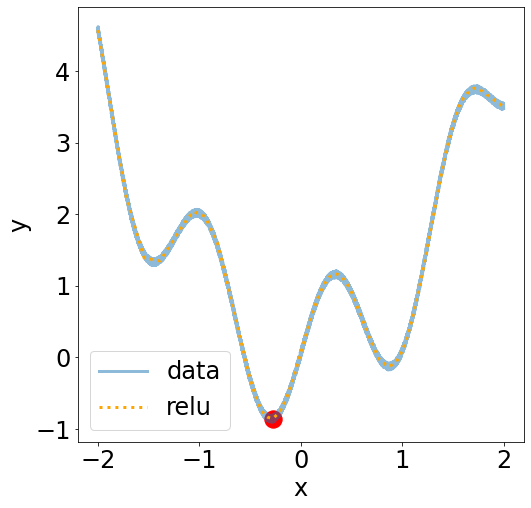

In [54]:
fig,ax = plt.subplots(1,figsize = (8,8))
ax.plot(x,y,linewidth = 3.0,label = "data", alpha = 0.5)
ax.plot(x,y_predict_relu,linewidth = 3.0,linestyle="dotted",label = "relu",color = "orange")
ax.scatter([solutions[3][0]],[solutions[3][1]],color = "red",s = 300)

plt.xlabel("x")
plt.ylabel("y")
plt.legend();